In [11]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns
import re
from transformers import BertTokenizer, BertForSequenceClassification,AdamW
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix

chunk_size = 100000
json_file_path = "yelp_academic_dataset_review.json"

# Read the JSON file in chunks
chunks = pd.read_json(json_file_path, lines=True, chunksize=chunk_size)

# Iterate over chunks and process each chunk
for i, df_chunk in enumerate(chunks):
    print(f"Processing chunk {i + 1}")

    # Save the chunk to a CSV file with a unique filename
    chunk_csv_path = f"chunk_{i + 1}.csv"
    df_chunk.to_csv(chunk_csv_path, index=False)
    df_chunk_from_csv = pd.read_csv(chunk_csv_path)

Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Processing chunk 13
Processing chunk 14
Processing chunk 15
Processing chunk 16
Processing chunk 17
Processing chunk 18
Processing chunk 19
Processing chunk 20
Processing chunk 21
Processing chunk 22
Processing chunk 23
Processing chunk 24
Processing chunk 25
Processing chunk 26
Processing chunk 27
Processing chunk 28
Processing chunk 29
Processing chunk 30
Processing chunk 31
Processing chunk 32
Processing chunk 33
Processing chunk 34
Processing chunk 35
Processing chunk 36
Processing chunk 37
Processing chunk 38
Processing chunk 39
Processing chunk 40
Processing chunk 41
Processing chunk 42
Processing chunk 43
Processing chunk 44
Processing chunk 45
Processing chunk 46
Processing chunk 47
Processing chunk 48
Processing chunk 49
Processing chunk 50
Processin

In [2]:
# Using the first 100000
chunk_size = 100000
file= "yelp_academic_dataset_review.json"

# Read the JSON file in chunks
chunks1 = pd.read_json(file, lines=True, chunksize=chunk_size)

# Iterate over chunks and process each chunk
for i, x in enumerate(chunks1):
    print(f"Processing chunk {i + 1}")

    # Save the first chunk to a CSV file
    if i == 0:
        first_chunk_csv_path = "first_chunk.csv"
        x.to_csv(first_chunk_csv_path, index=False)

    df= pd.read_csv("first_chunk.csv")
    break

Processing chunk 1


In [3]:
df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
99995,pAEbIxvr6ebx2bHc1XvguA,SMH5CeiLvKx61lKwtLZ_PA,lV0k3BnslFRkuWD_kbKd0Q,4,0,0,0,Came here for lunch with a group. They were bu...,2018-05-30 22:28:56
99996,xH1AoE-4nf2ECGQJRjO4_g,2clTdtp-BjphxLjN83CpUA,G0xz3kyRhRi6oZl7KfR0pA,1,1,0,0,The equipment is so old and so felty! I just u...,2015-04-05 23:31:52
99997,GatIbXTz-WDru5emONUSIg,MRrN6DH3QGCFcDv5RENYVg,C4lZdhasjZVQyDlOiXY1sA,4,0,0,0,This is one of my favorite Mexican restaurants...,2016-06-04 00:59:15
99998,6NfkodAdhvI89xONXuBC3A,rnNQzeKJbvqVCsYsL10mkQ,dChRGpit9fM_kZK5pafNyA,2,0,0,0,Came here for brunch - had an omlette ($19 + t...,2018-06-11 12:45:08


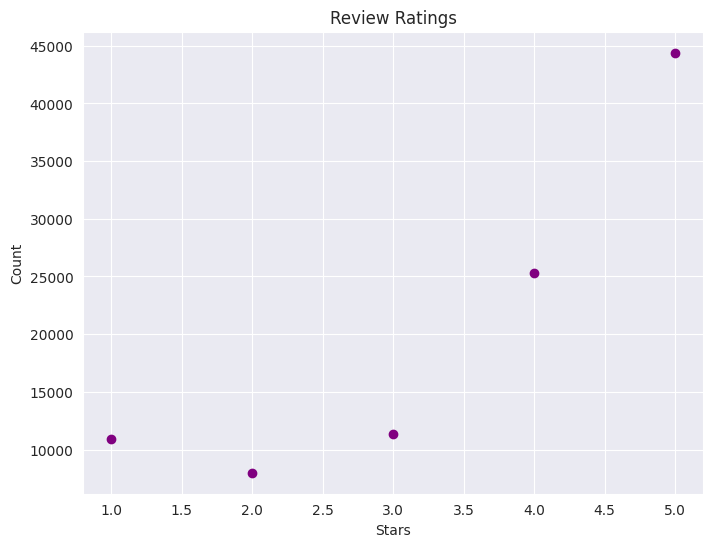

In [4]:
### Data Visualization
plt.figure(figsize=(8, 6))
plt.scatter(df['stars'].value_counts().sort_index().index, df['stars'].value_counts().sort_index(), color='purple')
plt.title('Review Ratings')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

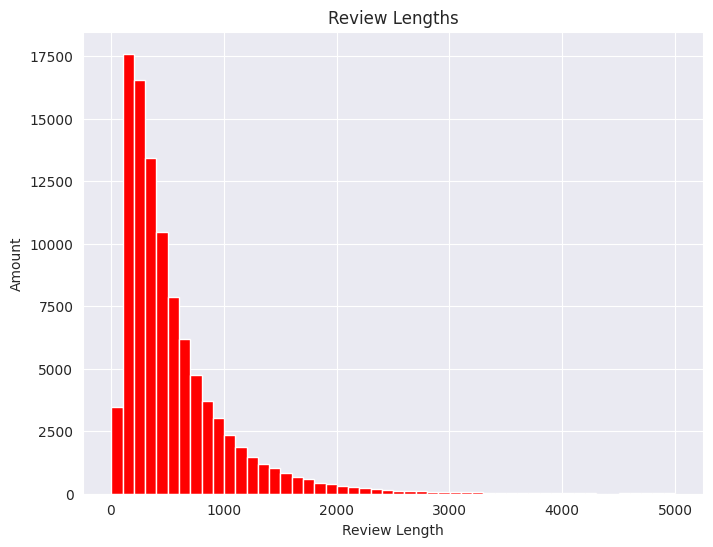

In [5]:
# Plot the distribution of review lengths
plt.figure(figsize=(8, 6))
df['review_length'] = df['text'].apply(len)
df['review_length'].hist(bins=50, color='red')
plt.title('Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Amount')
plt.show()

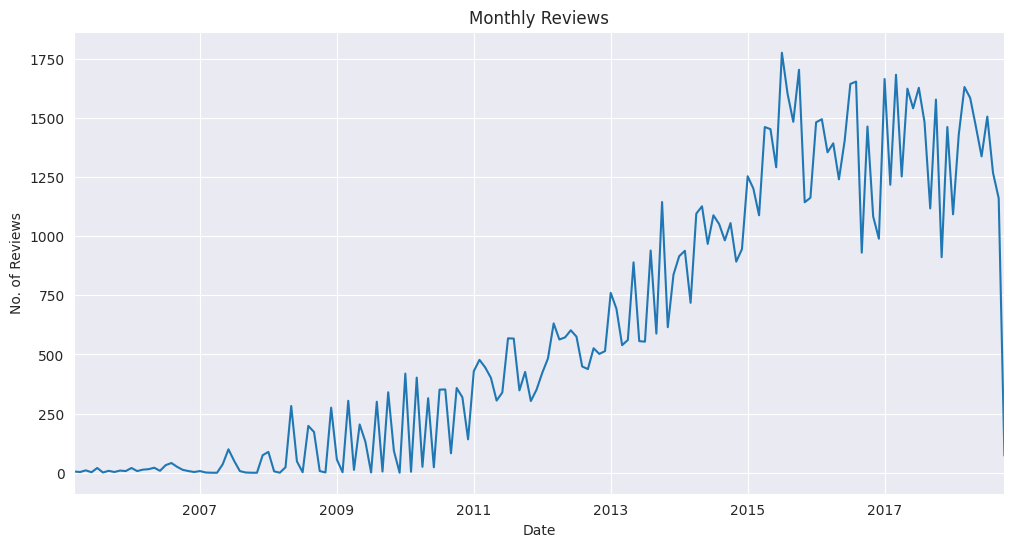

In [6]:
df['date'] = pd.to_datetime(df['date'])

# Plot the time distribution of reviews
plt.figure(figsize=(12, 6))
df.set_index('date').resample('M').size().plot()
plt.title('Monthly Reviews')
plt.xlabel('Date')
plt.ylabel('No. of Reviews')
plt.show()
matrix = df[['stars', 'useful', 'funny', 'cool', 'review_length']].corr()


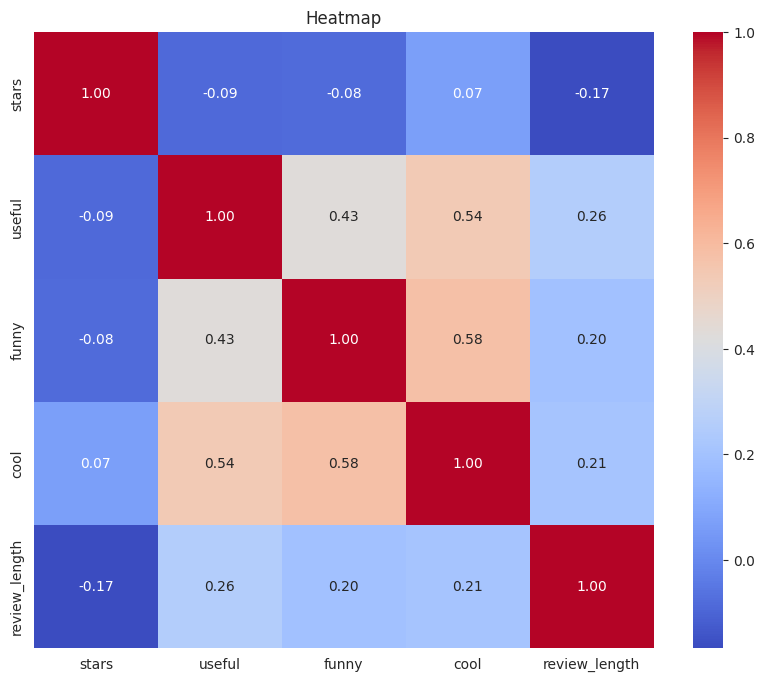

In [7]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap')
plt.show()

In [1]:
# Remove Null values 
null_values = df.isnull().sum()
print("Nulls:\n", null_values)

NameError: name 'df' is not defined

In [ ]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

### Prepairing sentiment Labels

In [8]:
def sentiment(stars):  #Ashken
    if 0 <= stars <= 2.5:
        return -1 #negative
    elif 2.6 <= stars <= 3.4:
        return 0 #normal
    elif 3.5 <= stars <= 5:
        return 1 #positive
    else:
        return 'undefined'

df['sentiment_label'] = df['stars'].apply(sentiment)
le = LabelEncoder()
df['encoded_sentiment'] = le.fit_transform(df['sentiment_label'])

# Extract labels
y = df['encoded_sentiment'].values
df.to_csv('preprocessed_data1.csv', index=False)

In [9]:
df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,review_length,sentiment_label,encoded_sentiment
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,513,0,1
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,829,1,2
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,339,0,1
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,243,1,2
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,534,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,pAEbIxvr6ebx2bHc1XvguA,SMH5CeiLvKx61lKwtLZ_PA,lV0k3BnslFRkuWD_kbKd0Q,4,0,0,0,Came here for lunch with a group. They were bu...,2018-05-30 22:28:56,208,1,2
99996,xH1AoE-4nf2ECGQJRjO4_g,2clTdtp-BjphxLjN83CpUA,G0xz3kyRhRi6oZl7KfR0pA,1,1,0,0,The equipment is so old and so felty! I just u...,2015-04-05 23:31:52,205,-1,0
99997,GatIbXTz-WDru5emONUSIg,MRrN6DH3QGCFcDv5RENYVg,C4lZdhasjZVQyDlOiXY1sA,4,0,0,0,This is one of my favorite Mexican restaurants...,2016-06-04 00:59:15,234,1,2
99998,6NfkodAdhvI89xONXuBC3A,rnNQzeKJbvqVCsYsL10mkQ,dChRGpit9fM_kZK5pafNyA,2,0,0,0,Came here for brunch - had an omlette ($19 + t...,2018-06-11 12:45:08,258,-1,0


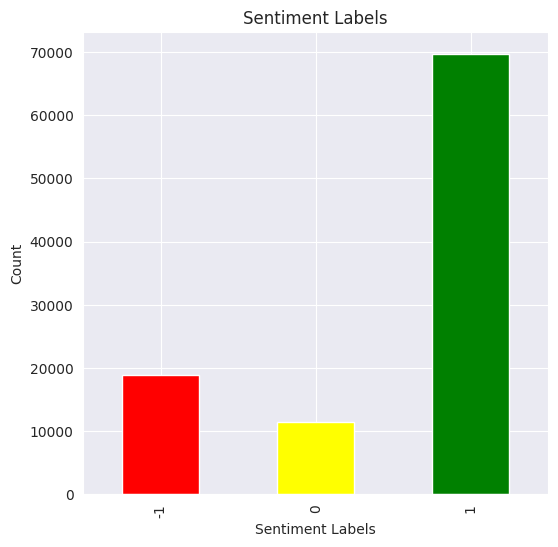

In [10]:
plt.figure(figsize=(6, 6))
df['sentiment_label'].value_counts().sort_index().plot(kind='bar', color=['red', 'yellow', 'green'])
plt.title('Sentiment Labels')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.show()

In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)